In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
#PCA, splits and metrics
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import  metrics
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# data
train = pd.read_csv('../input/train.csv')
target = train["label"]
train = train.drop("label",1)

In [3]:
# Train set
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


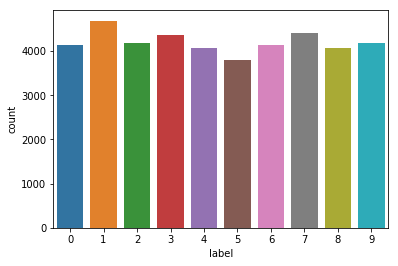

In [7]:
# Digits
sn.countplot(target)

In [8]:
#decompose train data
pca = decomposition.PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)

In [9]:
# split

X_train, X_test, y_train, y_test = train_test_split(transform_train, target,
                                                    test_size=0.5, random_state=5)

In [10]:
# KNN model

params = {"n_neighbors": np.arange(1, 20, 2),
          "metric": ["euclidean"]}

KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN, params, verbose = 1, cv=3)

grid.fit(X_train, y_train)
print(grid.best_estimator_)

pred_knn = grid.predict(X_test)
target_names =  [str(x) for x in range(9 + 1)]
print(metrics.classification_report(y_test, pred_knn, target_names=target_names))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  9.4min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2040
           1       0.97      0.99      0.98      2320
           2       0.97      0.96      0.97      2034
           3       0.96      0.96      0.96      2160
           4       0.97      0.96      0.96      2047
           5       0.96      0.96      0.96      1909
           6       0.97      0.99      0.98      2069
           7       0.96      0.97      0.97      2241
           8       0.98      0.94      0.96      1992
           9       0.94      0.95      0.94      2188

   micro avg       0.97      0.97      0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [16]:
#Random Forest

param_trees = {'n_estimators': [100],
               'max_features': [4, 5, 7, 10],
               'max_depth': [5, 10, 15, None], 
               'min_samples_leaf':[5, 10],
               'random_state': [0]}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=3, verbose=1, n_jobs=3)

grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_estimator_)

y_pred_rf = grid_search_rf.predict(X_test)
target_names =  [str(x) for x in range(9 + 1)]
print(metrics.classification_report(y_test, y_pred_rf, target_names=target_names))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.3min
[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed: 13.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2040
           1       0.97      0.98      0.98      2320
           2       0.93      0.91      0.92      2034
           3       0.89      0.92      0.90      2160
           4       0.94      0.93      0.93      2047
           5       0.93      0.91      0.92      1909
           6       0.95      0.97      0.96      2069
           7       0.94      0.94      0.94      2241
           8       0.91      0.90      0.90      1992
           9       0.92      0.90      0.91      2188
